<center>
<img src="https://github.com/Yorko/mlcourse.ai/blob/master/img/ods_stickers.jpg?raw=true" />
    
<br>

<div style="font-weight:700;font-size:25px"> [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course </div>

<br>

Auteurs: [Vitaliy Radchenko](https://www.linkedin.com/in/vitaliyradchenk0/) et [Yury Kashnitsky](https://yorko.github.io). Traduit et édité par [Christina Butsko](https://www.linkedin.com/in/christinabutsko/), [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), [Anna Shirshova](http://linkedin.com/in/anna-shirshova-b908458b),  [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/) et [Ousmane Cissé](https://github.com/oussou-dev). Ce matériel est soumis aux termes et conditions de la licence [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). L'utilisation gratuite est autorisée à des fins non commerciales.

# <center> Thème 5. Ensembles et Forêts aléatoires (random forest) </center>
<center> <div style="font-weight:700;font-size:25px"> Partie 1. Bagging (Boostrap Aggregating) </div> </center>



<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Outline" data-toc-modified-id="Outline-1">Outline</a></span></li><li><span><a href="#1.-Ensembles" data-toc-modified-id="1.-Ensembles-2">1. Ensembles</a></span></li><li><span><a href="#2.-Bootstrapping" data-toc-modified-id="2.-Bootstrapping-3">2. Bootstrapping</a></span></li><li><span><a href="#3.-Bagging" data-toc-modified-id="3.-Bagging-4">3. Bagging</a></span></li><li><span><a href="#4.-L'erreur-Out-of-bag" data-toc-modified-id="4.-L'erreur-Out-of-bag-5">4. L'erreur Out-of-bag</a></span></li><li><span><a href="#5.-Mission-d'entraînement" data-toc-modified-id="5.-Mission-d'entraînement-6">5. Mission d'entraînement</a></span></li><li><span><a href="#6.-Ressources-utiles" data-toc-modified-id="6.-Ressources-utiles-7">6. Ressources utiles</a></span></li></ul></div>

Dans des articles précédents, vous avez exploré différents algorithmes de classification ainsi que des techniques pouvant être utilisées pour valider et évaluer correctement la qualité de vos modèles.

Supposons maintenant que vous avez choisi le meilleur modèle possible pour un problème particulier et que vous vous efforcez d’améliorer encore sa précision. Dans ce cas, vous devez appliquer des techniques d’apprentissage automatique plus avancées, appelées collectivement **_ensembles_**.

Un *ensemble* est une collection d’éléments qui contribuent collectivement à un tout. Un exemple familier est un ensemble musical, qui associe les sons de plusieurs instruments de musique pour créer une harmonie, ou des ensembles architecturaux, qui sont un ensemble de bâtiments conçus comme une unité. Dans les ensembles, le résultat (global) harmonieux est plus important que la performance d'une partie individuelle.

## 1. Ensembles

Le théorème [Condorcet's jury theorem](https://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem) (1784) traite d'un ensemble dans un certain sens. Il indique que, si chaque membre du jury rend un jugement indépendant et que la probabilité d'une décision correcte par chaque juré est supérieure à 0,5, la probabilité d'une décision correcte par l'ensemble du jury augmente avec le nombre total de jurés et tend à un. D'autre part, si la probabilité d'avoir raison est inférieure à 0,5 pour chaque juré, la probabilité d'une décision correcte par l'ensemble du jury diminue avec le nombre de jurés et tend vers zéro.

Écrivons une expression analytique pour ce théorème:

- $\large N$ est le nombre total de jurés;
- $\large m$ est un nombre minimal de jurés qui formeraient une majorité, c'est-à-dire $\large m = floor(N/2) + 1$;
- $\large {N \choose i}$ est le nombre de combinaisons $\large i$ d'un ensemble contenant des éléments $\large N$.
- $\large p$ est la probabilité que le juré prenne la décision correcte;
- $\large \mu$ est la probabilité que le jury entier prenne la bonne décision.

Ensuite:

$$ \large \mu = \sum_{i=m}^{N}{N\choose i}p^i(1-p)^{N-i} $$

On peut voir que si $\large p > 0.5$, alors $\large \mu > p$. De plus, si $\large N \rightarrow \infty $, alors $\large \mu \rightarrow 1$.

Regardons un autre exemple d'ensembles : une observation connue sous le nom de [ Wisdom of the crowd](https://en.wikipedia.org/wiki/Wisdom_of_the_crowd). <img src="https://github.com/Yorko/mlcourse.ai/blob/master/img/bull.png?raw=true" align="right" width=15% height=15%> En 1906, [Francis Galton](https://en.wikipedia.org/wiki/Francis_ Galton) s'est rendu à une foire à Plymouth où il a assisté à un concours pour les agriculteurs. 800 participants ont essayé d'estimer le poids d'un taureau abattu. Le poids réel du taureau était de 1198 livres. Bien qu'aucun des fermiers ne puisse deviner le poids exact de l'animal, la moyenne de leurs prédictions était de 1197 livres.

Une idée similaire de réduction des erreurs a été adoptée dans le domaine de l'apprentissage automatique.

## 2. Bootstrapping

*Bagging* (également connu sous le nom de [Bootstrap aggregation](https://en.wikipedia.org/wiki/Bootstrap_aggregating)) est l'une des premières et des plus fondamentales des techniques d'ensemble. Il a été proposé par [Leo Breiman](https://en.wikipedia.org/fr/wiki/Leo_Breiman) en 1994. Le Bagging repose sur la méthode statistique de [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_%28statistics%29), ce qui permet d'évaluer de nombreuses statistiques de modèles complexes.

La méthode de Bootstrap se présente ainsi. Soit un échantillon $\large X$ de taille $\large N$. Nous pouvons créer un nouvel échantillon à partir de l'échantillon d'origine en tirant des éléments $\large N$ de celui-ci de manière aléatoire et uniforme, avec remplacement. En d'autres termes, nous sélectionnons un élément aléatoire dans l'échantillon d'origine de taille $\large N$ et procédons de la sorte $\large N$ fois. Tous les éléments sont également susceptibles d'être sélectionnés, ainsi chaque élément est tiré avec la probabilité égale à $\large \frac{1}{N}$.

Disons que nous tirons les boules d'un sac une à la fois. A chaque étape, la boule sélectionnée est remise dans le sac de sorte que la sélection suivante soit faite de manière égale, c'est-à-dire à partir du même nombre de boules $\large N$. Notez que, comme nous remettons les boules dans le sac, il peut y avoir des doublons dans le nouvel échantillon. Appelons ce nouvel exemple $\large X_1$.

En répétant cette procédure $\large M$ fois, nous créons $\large M$ * échantillons bootstrap * $\large X_1, \dots, X_M$. Au final, nous disposons d’un nombre suffisant d’échantillons et pouvons calculer diverses statistiques de la distribution initiale.

![image](https://github.com/Yorko/mlcourse.ai/blob/master/img/bootstrap_eng.png?raw=true)

Pour notre exemple, nous utiliserons le jeu de données `telecom_churn` bien connu. Précédemment, lorsque nous avions discuté de l'importance des caractéristiques, nous avions constaté que l'une des caractéristiques les plus importantes de cet ensemble de données était le nombre d'appels au service clientèle. Visualisons les données et regardons la distribution de cette caractéristique.

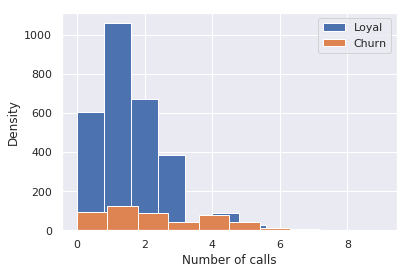

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline
from matplotlib import pyplot as plt

telecom_data = pd.read_csv('../../data/telecom_churn.csv')

telecom_data.loc[telecom_data['Churn'] == False,
                 'Customer service calls'].hist(label='Loyal')
telecom_data.loc[telecom_data['Churn'] == True,
                 'Customer service calls'].hist(label='Churn')
plt.xlabel('Number of calls')
plt.ylabel('Density')
plt.legend();

On dirait que les clients fidèles font moins d’appels au service clientèle que ceux qui finissent par partir. À présent, il peut être judicieux d’estimer le nombre moyen d’appels au service clientèle dans chaque groupe. Comme notre ensemble de données est petit, nous ne pourrions pas obtenir une bonne estimation en calculant simplement la moyenne de l'échantillon initial. Nous ferons mieux d'appliquer la méthode bootstrap. Générons 1000 nouveaux échantillons bootstrap à partir de notre population d'origine et produisons une estimation par intervalle de la moyenne.

In [2]:
def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# on sauvegarde les données sur les clients fidèles et les anciens clients pour fractionner l'ensemble de données
loyal_calls = telecom_data.loc[telecom_data['Churn'] == False,
                               'Customer service calls'].values
churn_calls = telecom_data.loc[telecom_data['Churn'] == True,
                          'Customer service calls'].values

# nous fixonx random.seed() à 0 pour conserver la reproductibité des résultats
np.random.seed(0)

# Générer les échantillons à l'aide du bootstrapping et calculer la moyenne pour chacun d'entre eux
loyal_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(loyal_calls, 1000)]
churn_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(churn_calls, 1000)]

# afficher les estimations d'intervalle résultantes
print("Service calls from loyal: mean interval", stat_intervals(loyal_mean_scores, 0.05))
print("Service calls from churn: mean interval", stat_intervals(churn_mean_scores, 0.05))

Service calls from loyal: mean interval [1.4077193  1.49473684]
Service calls from churn: mean interval [2.0621118  2.39761905]


Pour l'interprétation des intervalles de confiance, vous pouvez lire cette [note](https://www.graphpad.com/guides/prism/7/statistics/stat_more_about_confidence_interval.htm?toc=0&printWindow) concise ou tout cours sur les statistiques. Il n'est pas exact de dire qu'un intervalle de confiance contient 95% des valeurs. Notez que l'intervalle pour les clients fidèles est plus étroit, ce qui est raisonnable car ils effectuent moins d'appels (0, 1 ou 2) par rapport aux clients désabonnés qui appellent jusqu'à en avoir marre et décident de changer de fournisseur.

## 3. Bagging

Maintenant que vous avez compris l’idée du Bootstraping, nous pouvons passer au *Bagging*.

Supposons que nous ayons un jeu de données d'entraînement $\large X$. À l’aide du Bootstraping , nous générons des exemples $\large X_1, \dots, X_M$. Maintenant, pour chaque échantillon bootstrap, nous entraînons son propre classifieur $\large a_i(x)$. Le classifieur final fera la moyenne des sorties de tous ces classifieurs individuels. En cas de classification, cette technique correspond au vote:
$$\large a(x) = \frac{1}{M}\sum_{i = 1}^M a_i(x).$$

L'image ci-dessous illustre cet algorithme:
<img src="https://github.com/Yorko/mlcourse.ai/blob/master/img/bagging.png?raw=true" alt="image"/>

Considérons un problème de régression avec les algorithmes de base $\large b_1(x), \dots , b_n(x)$. Supposons qu'il existe une fonction cible idéale de vraies réponses $\large y(x)$ définie pour toutes les entrées et que la distribution $\large p(x)$ est définie. Nous pouvons ensuite exprimer l'erreur pour chaque fonction de régression comme suit :

$$\large \varepsilon_i(x) = b_i(x) - y(x), \quad i = 1, \dots, n$$

Et la valeur attendue de l'erreur quadratique moyenne :

$$\large \E_x\left[\left(b_i(x) - y(x)\right)^{2}\right] = \E_x\left[\varepsilon_i^{2}(x)\right].$$

Ensuite, l’erreur moyenne sur toutes les fonctions de régression se présentera comme suit :
$$ \large \E_1 = \frac{1}{n} \E_x\left[ \sum_i^n \varepsilon_i^{2}(x)\right]$$

Nous supposerons que les erreurs sont non biaisées et non corrélées, c'est-à-dire :

$$\large \begin{array}{rcl} \E_x\left[\varepsilon_i(x)\right] &=& 0, \\
\E_x\left[\varepsilon_i(x)\varepsilon_j(x)\right] &=& 0, \quad i \neq j. \end{array}$$

Construisons maintenant une nouvelle fonction de régression qui calculera la moyenne des valeurs des fonctions individuelles :

$$\large a(x) = \frac{1}{n}\sum_{i=1}^{n}b_i(x)$$

Trouvons son erreur quadratique moyenne :

$$\large \begin{array}{rcl}\E_n &=& \E_x\left[\frac{1}{n}\sum_{i=1}^{n}b_i(x)-y(x)\right]^2 \\
&=& \E_x\left[\frac{1}{n}\sum_{i=1}^{n}\varepsilon_i\right]^2 \\
&=& \frac{1}{n^2}\E_x\left[\sum_{i=1}^{n}\varepsilon_i^2(x) + \sum_{i \neq j}\varepsilon_i(x)\varepsilon_j(x)\right] \\
&=& \frac{1}{n}\E_1\end{array}$$

Ainsi, en faisant la moyenne des réponses individuelles, nous avons réduit l’erreur quadratique moyenne par un facteur de $\large n$.

Dans notre leçon précédente, rappelons les composants qui constituent l'erreur totale hors échantillon : 

$$\large \begin{array}{rcl} 
\Err\left(\vec{x}\right) &=& \E\left[\left(y - \hat{f}\left(\vec{x}\right)\right)^2\right] \\
&=& \sigma^2 + f^2 + \Var\left(\hat{f}\right) + \E\left[\hat{f}\right]^2 - 2f\E\left[\hat{f}\right] \\
&=& \left(f - \E\left[\hat{f}\right]\right)^2 + \Var\left(\hat{f}\right) + \sigma^2 \\
&=& \Bias\left(\hat{f}\right)^2 + \Var\left(\hat{f}\right) + \sigma^2
\end{array}$$

Le Bagging réduit la variance d'un classifieur en diminuant la différence d'erreur lorsque nous entraînons le modèle sur différents jeux de données. En d'autres termes, le Bagging empêche le sur-apprentissage. L'efficacité du Bagging vient du fait que les modèles individuels sont très différents en raison des données d'entraînement différentes et que leurs erreurs s'annulent pendant le vote. De plus, les valeurs aberrantes sont probablement omises dans certains exemples de bootstrap d'entraînement.

La bibliothèque `scikit-learn` prend en charge le Bagging avec les méta-estimateurs `BaggingRegressor` et `BaggingClassifier`. Vous pouvez utiliser la plupart des algorithmes comme base.

Examinons comment fonctionne le Bagging et comparons-le avec un arbre de décision. Pour cela, nous allons utiliser un exemple tiré de [la documentation de sklearn](http://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py).

![image](https://github.com/Yorko/mlcourse.ai/blob/master/img/tree_vs_bagging_eng.png?raw=true)

L'erreur pour l'arbre de décision:
$$ \large 0.0255 \, (\Err) = 0.0003 \, (\Bias^2)  + 0.0152 \, (\Var) + 0.0098 \, (\sigma^2) $$

L'erreur lors de l'utilisation du Bagging:
$$ \large 0.0196 \, (\Err) = 0.0004 \, (\Bias^2)  + 0.0092 \, (\Var) + 0.0098 \, (\sigma^2) $$

Comme vous pouvez le voir sur le graphique ci-dessus, la variance de l'erreur est beaucoup plus faible pour le Bagging. Rappelez-vous que nous l'avons déjà prouvé théoriquement.

Le Bagging est efficace sur de petits ensembles de données. L'abandon d'une petite partie des données d'apprentissage conduit à la construction de classifieurs de base très différents. Si vous avez un grand jeu de données, vous générerez des échantillons de bootstrap de taille beaucoup plus petite.

L'exemple ci-dessus ne sera probablement pas applicable à un travail réel. En effet, nous avons fortement présumé que nos erreurs individuelles ne sont pas corrélées. Le plus souvent, c’est beaucoup trop optimiste pour des applications réelles. Lorsque cette hypothèse est fausse, la réduction d'erreur ne sera pas aussi significative. Dans les cours suivants, nous aborderons certaines méthodes d'ensemble plus sophistiquées, qui permettent des prévisions plus précises sur des problèmes du monde réel.

## 4. L'erreur Out-of-bag

Pour la suite, dans le cas d'une forêt aléatoire, il n'est pas nécessaire d'utiliser des échantillons de validation croisée ou un échantilon de données de test (hold-out samples) pour obtenir une estimation non biaisée de l'erreur. Pourquoi ? Parce que, dans les techniques d'ensemble, l'estimation de l'erreur se fait en interne.
 
Les arbres aléatoires sont construits à l'aide de différents échantillons bootstrap de l'ensemble de données d'origine. Environ 37% des entrées sont exclues d'un échantillon bootstrap particulier et ne sont pas utilisées dans la construction de l'arbre $\large k$-th.

C'est facile à prouver. Supposons qu'il y a des exemples $\large \ell$ dans notre jeu de données.  A chaque étape, chaque point de données a une probabilité égale de se retrouver dans un échantillon bootstrap avec remplacement, probabilité $\large\frac{1}{\ell}.$ La probabilité qu’il n’existe pas d’échantillon bootstrap contenant un élément particulier de l'ensemble de données (c’est-à-dire qu’il a été omis $\large \ell$ fois) est égale à $\large (1 - \frac{1}{\ell})^\ell$. Lorsque $\large \ell \rightarrow +\infty$, il devient égal à la [seconde limite remarquable](https://en.wikipedia.org/wiki/List_of_limits) $\large \frac{1}{e}$. Ensuite, la probabilité de choisir un exemple spécifique est $\large \approx  1 - \frac{1}{e} \approx 63\%$.

Visualisons le fonctionnement de l'estimation de l'erreurs Out-of-Bag (ou OOBE) :

![image](https://github.com/Yorko/mlcourse.ai/blob/master/img/oob.png?raw=true)

La partie supérieure de la figure ci-dessus représente notre jeu de données d'origine. Nous l'avons divisé en ensembles d'entraînement (à gauche) et de test (à droite). Dans l'image de gauche, nous dessinons une grille qui divise parfaitement notre jeu de données en fonction des classes. Maintenant, nous utilisons la même grille pour estimer la part des réponses correctes sur notre ensemble de tests. Nous pouvons voir que notre classifieur a donné des réponses incorrectes dans les 4 cas qui n'ont pas été utilisés pendant l'entraînement (à gauche). Par conséquent, la précision de notre classifieur est $\large \frac{11}{15}*100\% = 73.33\%$.

En résumé, chaque algorithme de base est formé sur $\large \approx 63\%$ des exemples originaux. Il peut être validé sur le $\large \approx 37\%$ restant. L'estimation Out-of-Bag n'est rien de plus que l'estimation moyenne des algorithmes de base sur ces $\large \approx 37\%$ d'entrées laissées en dehors de l'entraînement.

## 5. Mission d'entraînement
Vous pouvez vous entraîner avec [cette mission](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring) dans laquelle vous travaillerez avec la régression logistique et le Random Forest dans un tâche de scoring de crédit. Avec une [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol).

## 6. Ressources utiles
- Cours principal [site](https://mlcourse.ai), [repo github](https://github.com/Yorko/mlcourse.ai) et [chaîne YouTube](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- mlcourse.ai [video](https://www.youtube.com/watch?v=neXJL-AqI_c) sur le Random Forest
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-5-ensembles-of-algorithms-and-random-forest-8e05246cbba7) based on this notebook
- Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
- Si vous lisez le Russse : un [article](https://habrahabr.ru/company/ods/blog/324402/) sur Habrahabr avec ~ le même material. Et une [video](https://youtu.be/G0DmuuFeC30) on YouTube
- Chapter 15 of the book “[Elements of Statistical Learning](https://statweb.stanford.edu/~tibs/ElemStatLearn/)” by Jerome H. Friedman, Robert Tibshirani, and Trevor Hastie.
- More about practical applications of random forests and other algorithms can be found in the [official documentation](http://scikit-learn.org/stable/modules/ensemble.html) of `scikit-learn`.
- For a more in-depth discussion of variance and decorrelation of random forests, see the [original paper](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf).